In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import seaborn as sns
import random
from sklearn.metrics.cluster import adjusted_rand_score

## Step 4: Exploring Data

In [2]:
df=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
Encode=preprocessing.OrdinalEncoder()
df.iloc[:,0:11]=Encode.fit_transform(df.iloc[:,0:11])
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-3,61,Every three months,Female
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,+2,51,Every three months,Female
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,+1,62,Every three months,Female
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,+4,69,Once a week,Female
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,I hate it!-5,47,Once a year,Male
1449,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,+2,36,Once a week,Female
1450,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,+3,52,Once a month,Female
1451,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,+4,41,Every three months,Male


In [5]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [6]:
df.describe().loc['mean']

yummy          0.552650
convenient     0.907777
spicy          0.093599
fattening      0.867171
greasy         0.526497
fast           0.900206
cheap          0.598761
tasty          0.644184
expensive      0.357880
healthy        0.198899
disgusting     0.242946
Age           44.604955
Name: mean, dtype: float64

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

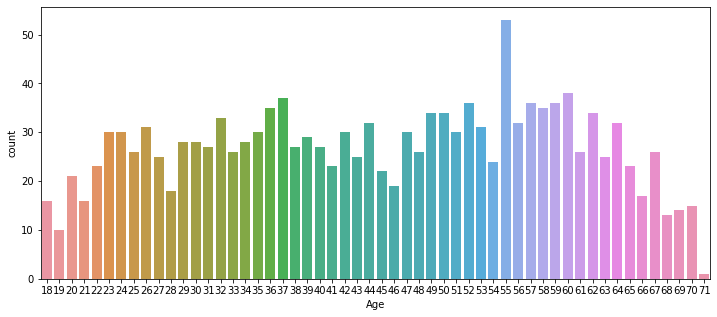

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(df["Age"])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yummy', ylabel='count'>

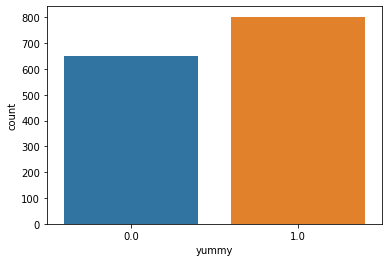

In [8]:
sns.countplot(df['yummy'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='convenient', ylabel='count'>

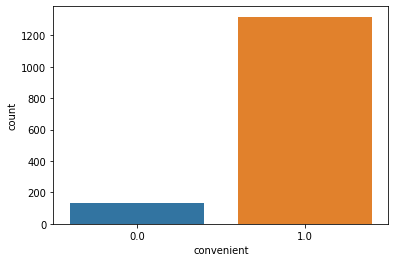

In [9]:
sns.countplot(df['convenient'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Like', ylabel='count'>

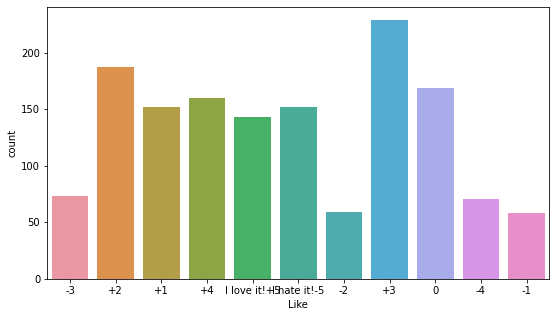

In [10]:
plt.figure(figsize=(9,5))
sns.countplot(df['Like'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VisitFrequency', ylabel='count'>

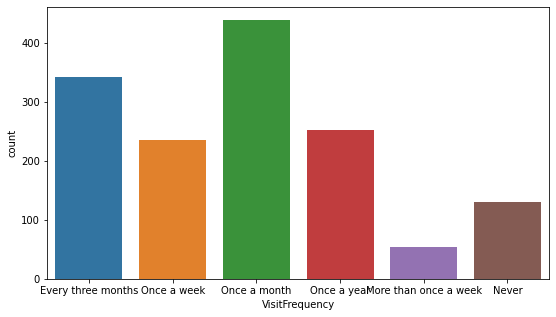

In [11]:
plt.figure(figsize=(9,5))
sns.countplot(df['VisitFrequency'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

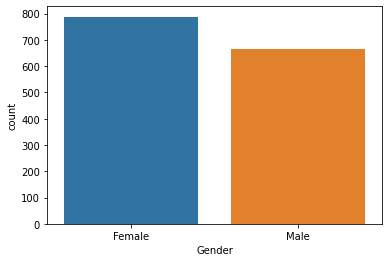

In [12]:
sns.countplot(df['Gender'])

PCA

In [13]:
pca=PCA(n_components=11)
elements=pca.fit_transform(df.iloc[:,:11])

In [14]:
pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [15]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [16]:
pca.singular_values_

array([28.84746118, 23.14716582, 19.22858381, 15.19626736, 12.85685762,
       11.82305052, 11.03895052, 10.48355462, 10.10742431,  9.48214684,
        9.02721076])

Text(0, 0.5, 'PC2')

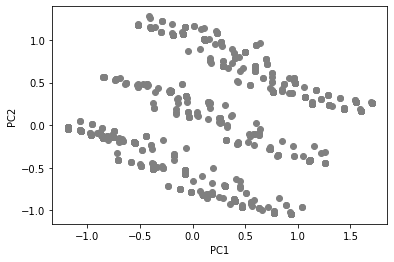

In [17]:
plt.scatter(elements[:,0],elements[:,1],color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [18]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

array([[-3.61062270e-01,  2.20986128e-01, -1.53628377e-01,
         2.19986067e-02, -1.03763875e-01,  5.29757254e-02,
        -8.12654949e-02,  3.58791168e-03,  1.51830465e-01,
        -2.74433629e-02,  1.07646304e-02],
       [-1.17593706e-01,  9.97077402e-03, -3.15464356e-02,
        -5.67988756e-02,  9.36663455e-02, -1.07922835e-01,
        -1.73059170e-02, -3.11104288e-02, -4.89795181e-03,
        -1.65683252e-01, -1.28310454e-01],
       [-4.81208051e-03,  1.14254458e-02, -1.86803378e-02,
         7.88102868e-02,  2.38275983e-02, -1.10174355e-01,
         2.05000559e-01,  1.03427703e-01,  1.06174649e-01,
        -1.88209353e-02,  3.35762202e-02],
       [ 8.79931408e-02, -2.07105622e-02, -1.62668873e-01,
        -1.41230038e-01, -2.47671292e-02, -1.26131412e-01,
        -1.11806587e-01,  1.62218071e-01, -4.25760567e-02,
        -1.32834990e-03,  5.94412622e-02],
       [ 2.30478197e-01, -3.87792593e-02, -4.04893113e-01,
         1.01278932e-01,  1.21937817e-01,  6.49550939e-02,
  

In [19]:
variables=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

In [20]:
fig = px.scatter(elements, x=0, y=1)
for i in range(11):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        text=variables[i],
    )
fig.show()

## Step 5: Extracting Segments

In [21]:
data= df.iloc[:,:11]

K-Means

In [22]:
K=range(2,9)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

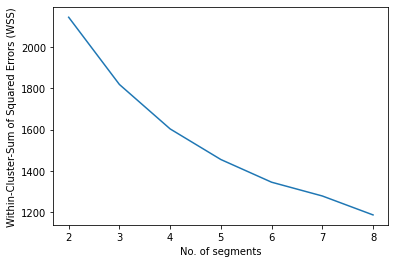

In [23]:
plt.xlabel('No. of segments')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

Text(0, 0.5, 'Within-Cluster-Sum of Squared Errors (WSS)')

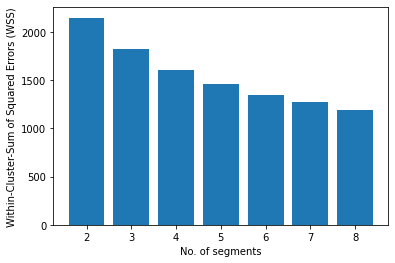

In [24]:
plt.bar(range(2,9),wss)
plt.xlabel('No. of segments')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')


Bootstrap Sampling

In [25]:
for i in range(2):
    sample=data.sample(100)
    for k in range(2,9):
        kmeans=cluster.KMeans(n_clusters=k)
        kmeans=kmeans.fit(sample)

K=4

In [26]:
final_kmeans=KMeans(n_clusters=4)
final_kmeans.fit(data)
y_kmeans=kmeans.predict(data)

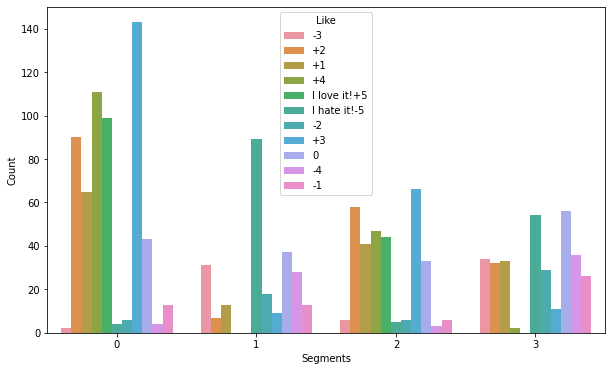

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x=final_kmeans.labels_,hue='Like',data=df)
plt.xlabel("Segments")
plt.ylabel("Count")
plt.show()



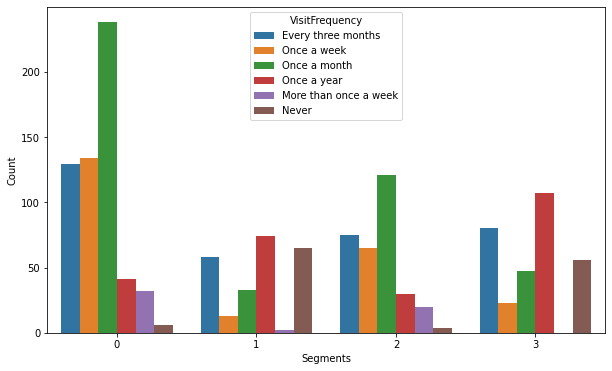

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x=final_kmeans.labels_,hue='VisitFrequency',data=df)
plt.xlabel("Segments")
plt.ylabel("Count")
plt.show()

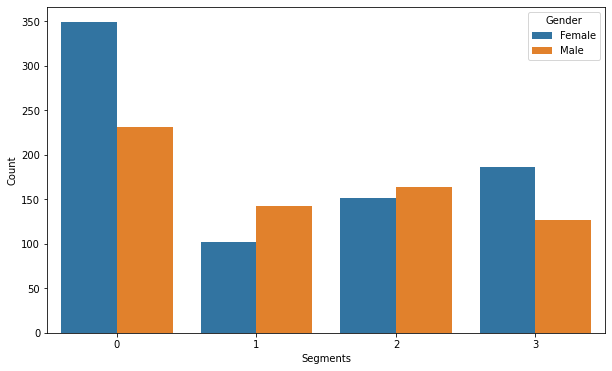

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=final_kmeans.labels_,hue='Gender',data=df)
plt.xlabel("Segments")
plt.ylabel("Count")
plt.show()

## Other steps

Cross Table

In [30]:
from statsmodels.graphics.mosaicplot import mosaic
crosstable=pd.crosstab(df['yummy'],df['Like'])
crosstable


Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
yummy,,,,,,,,,,,
0.0,73,55,30,8,43,49,67,65,113,147,0
1.0,79,132,199,152,15,10,6,6,56,5,143


In [31]:
crosstable=pd.crosstab(df['disgusting'],df['Like'])
crosstable

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
disgusting,,,,,,,,,,,
0.0,132,173,216,153,43,33,35,26,132,22,135
1.0,20,14,13,7,15,26,38,45,37,130,8
